<a href="https://colab.research.google.com/github/riyamariyageorge/mlprojects/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries and Load data

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/student/student-mat.csv'

# Load the CSV file
data = pd.read_csv(file_path, sep=';')

# Display the first few rows
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Preprocessing

In [15]:
relevant_features = ['sex','age','studytime','failures','schoolsup','famsup',
                     'paid','activities','internet','romantic','famrel','freetime',
                     'goout','Dalc','Walc','health','absences','G1','G2']
target = 'G3'
df = data[relevant_features +[target]]
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders={}
for col in categorical_cols:
  le = LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoders[col]=le #save encoder for inverse transformation
df.head()


<ipython-input-15-de17c598f14a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
<ipython-input-15-de17c598f14a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
<ipython-input-15-de17c598f14a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,sex,age,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,2,0,1,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6
1,0,17,2,0,0,1,0,0,1,0,5,3,3,1,1,3,4,5,5,6
2,0,15,2,3,1,0,1,0,1,0,4,3,2,2,3,3,10,7,8,10
3,0,15,3,0,0,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,16,2,0,0,1,1,0,0,0,4,3,2,1,2,5,4,6,10,10


# Train and Test split


In [18]:
X = df[relevant_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (316, 19)
Testing data shape: (79, 19)


# Train linear regression model

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

# Evaluate Model

In [20]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean squared error: 5.00
R-squared: 0.76


# Visualized data

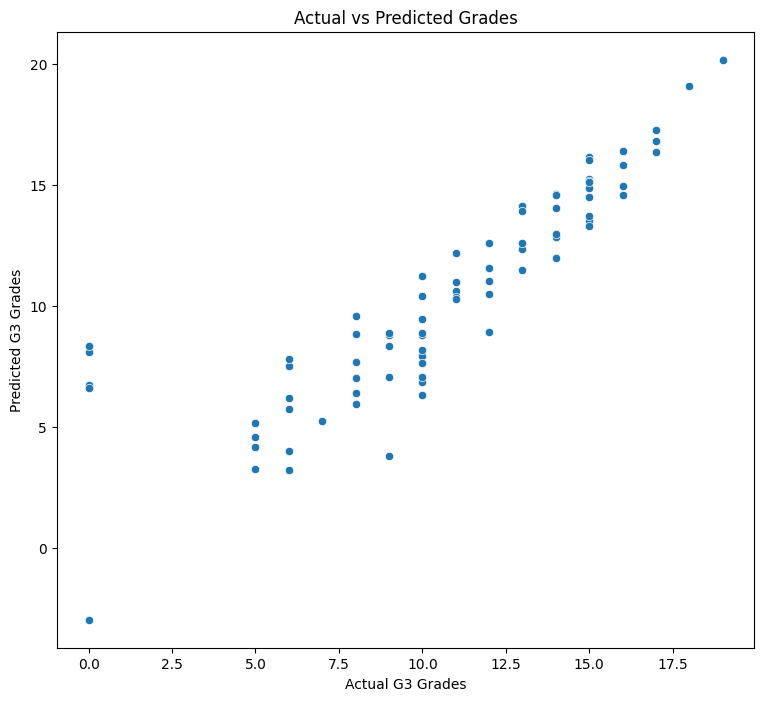

In [22]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual G3 Grades")
plt.ylabel("Predicted G3 Grades")
plt.title("Actual vs Predicted Grades")
plt.show()